# Assignment 5: Geographic Data Analysis

### Assignment Description

In this assignment, you will be using a database of geographic data provided for you in the PySal library to create two plots: a choropleth map and a proportional symbol map. 

In addition to these two plots, you will compute the value of Moran's I for this data.

### Directions

The data for this assignment includes the United States' lower 48 states. In addition to the state-by-state data, the dataset contains shape files for each state that you can use to create the choropleth and proportional symbol maps.

Using the data provided, perform the required analyses and create the requested maps.

### Submission Directions for Assignment Deliverables

This assignment will be auto-graded. We recommend that you use Jupyter Notebook in your browser to complete and submit this assignment. In order for your answers to be correctly registered in the system, you must place the code for your answers in the cell indicated for each question. In addition, you should submit the assignment in the cell's display area. The display area should contain only your answer with no extraneous information, or else the answer may not be picked up correctly.

Each cell that is going to be graded has a set of comment lines at the beginning of the cell. These lines are extremely important and must not be modified or removed. (Graded Cell and PartID comments must be in the same line for proper execution of code.)

Please execute each cell in Jupyter Notebook before submitting.

If you choose to download the file and work on your assignment locally, you can also upload your file to each part in the programming assignment submission space. The file you submit should be named "Assignment_5.ipynb".

### Evaluation

There are three parts in the grading, and each part has one test case where the total number of points for all parts is 3. If some part of your data is incorrect, you will get a score of 0.0. If the submission fails, we will return the corresponding error messages. If the submission is correct, you will see "Correct" with 1.0 point for each part.

In [127]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pysal

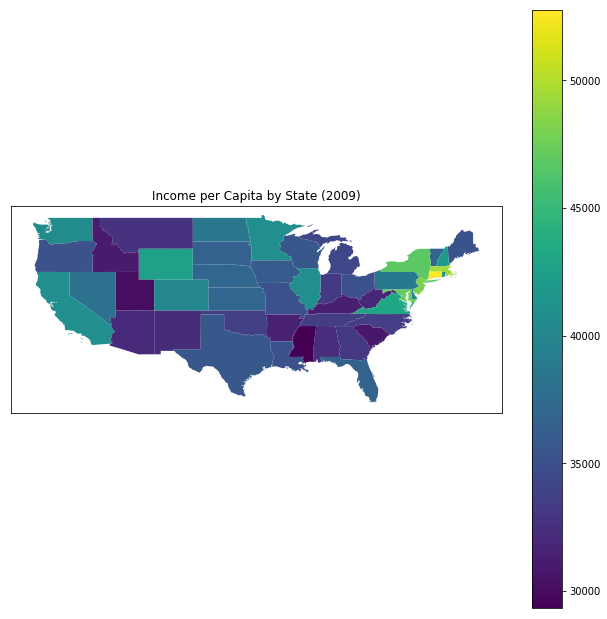

In [128]:
# Graded Cell, PartID: CkcsR
# Part 1: Using the PySal Data, create a choropleth path of the United States
# that depicts the per capita income of each US state in 2009.
# Notes: The PySal and GeoPandas libraries both contain utility functions that
# may make this task easier.
us_data = pd.read_csv(pysal.examples.get_path('usjoin.csv')).rename(columns={"Name": "STATE_NAME"})
us_income = us_data[['STATE_NAME','2009']]

us_shape = gpd.read_file(pysal.examples.get_path('us48.shp'))

combined = us_shape.merge(us_income, on='STATE_NAME')

#print(combined)
fig, ax = plt.subplots(1, figsize=(11, 11))

combined.plot(column='2009', ax=ax, legend=True, legend_kwds={'label': "Income Range",'orientation': "horizontal"})

plt.title('Income per Capita by State (2009)')
plt.xticks([])
plt.yticks([])
plt.show()

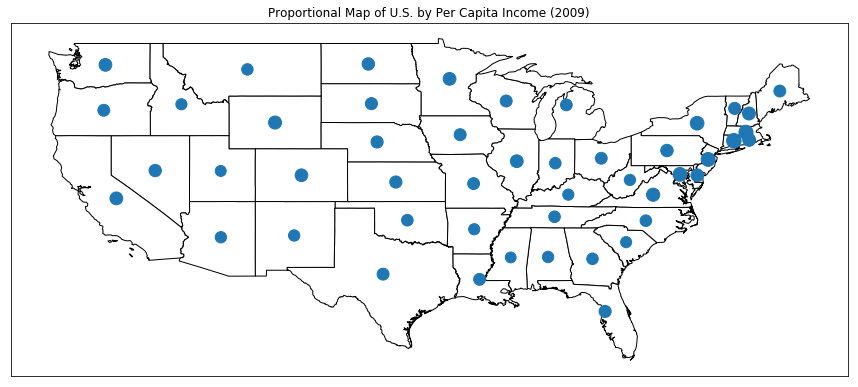

In [130]:
# Graded Cell, PartID: FqNRm
# Part 2: Again using the PySal Data, create a proportional symbol map showing 
# a dot at the centroid of each state that is scaled to the per capita income 
# of each US state in 2009.
# Notes: The demonstration notebook for this unit contains code that performs 
# a similar task and may be a useful reference for your assignment.


centroids = list(us_shape['geometry'].centroid)
#print(list(combined['2009']))

df = pd.DataFrame({'y':[centroids[i].y for i in range(len(centroids))],
                   'x':[centroids[i].x for i in range(len(centroids))],
                   'data':list(combined['2009'])})
fig, ax = plt.subplots(1, figsize=(15, 15))
base = us_shape.plot(color='white', edgecolor='black', ax=ax)

df.plot(kind='scatter', x='x', y='y', s=df['data']*0.004, ax=base)
plt.title('Proportional Map of U.S. by Per Capita Income (2009)')
plt.xticks([])
plt.yticks([])
plt.xlabel("")
plt.ylabel('')
plt.show()

In [106]:
# Graded Cell, PartID: CtQYv
# Part 3: Using the same data, compute the value of Moran's I for the per 
# capita income of each US state in 2009 using Rook Continuity. Report the 
# value of I rounded to 4 decimal places (i.e. x.XXXX)
# Notes: Again, the PySal and GeoPandas libraries may contain useful utility
# functions.

y = pysal.open(pysal.examples.get_path('usjoin.csv')).by_col['2009']

w = pysal.weights.rook_from_shapefile(pysal.examples.get_path('us48.shp'))

mi = pysal.Moran(y, w, two_tailed=False)
print("{:.4f}".format(mi.I))

0.0407
